In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib as plt
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

In [80]:
dataset=pd.read_csv("logistic_regression_data.csv", sep=",").copy()

In [81]:
dataset

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [82]:
dataframe = pd.DataFrame(dataset)

In [83]:
dataframe.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


In [84]:
dataframe.tail(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN
4237,4237,56,NaN,M,YES,25.0,0.0,0,0,0,255.0,138.0,80.0,23.44,67.0,79.0,NaN


In [85]:
dataframe.isnull().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [86]:
dataframe['heartRate'] = dataframe['heartRate'].fillna(dataframe['heartRate'].mean())
dataframe['heartRate']=dataframe['heartRate'].astype(int)

In [87]:
dataframe = dataframe.dropna(subset="BMI")

In [88]:
dataframe['education'] = dataframe['education'].fillna(dataframe['education'].mean())
dataframe['education']=dataframe['education'].astype(int)

In [89]:
dataframe['cigsPerDay'] = dataframe['cigsPerDay'].fillna(dataframe['cigsPerDay'].mean())
dataframe['cigsPerDay']=dataframe['cigsPerDay'].astype(int)

In [90]:
dataframe['BPMeds'] = dataframe['BPMeds'].fillna(dataframe['BPMeds'].mean())
dataframe = dataframe.drop(columns="BPMeds")

In [91]:
dataframe['totChol'] = dataframe['totChol'].fillna(dataframe['totChol'].mean())
dataframe['totChol']=dataframe['totChol'].astype(int)

In [92]:
dataframe = dataframe.drop(columns="diabetes")

In [93]:
dataframe['TenYearCHD'] = dataframe['TenYearCHD'].fillna(dataframe['TenYearCHD'].mean())
dataframe['TenYearCHD']=dataframe['TenYearCHD'].astype(int)

In [94]:
dataframe = dataframe.drop(columns="prevalentStroke")

In [96]:
dataframe['glucose'] = dataframe['glucose'].fillna(dataframe['glucose'].mean())
dataframe['glucose']=dataframe['glucose'].astype(int)

In [97]:
dataframe.isnull().sum()

id              0
age             0
education       0
sex             0
is_smoking      0
cigsPerDay      0
prevalentHyp    0
totChol         0
sysBP           0
diaBP           0
BMI             0
heartRate       0
glucose         0
TenYearCHD      0
dtype: int64

In [98]:
dataframe.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4,M,NO,0,1,212,168.0,98.0,29.77,72,75,0
2,2,46,1,F,YES,10,0,250,116.0,71.0,20.35,88,94,0
3,3,50,1,M,YES,20,1,233,158.0,88.0,28.26,68,94,1
4,4,64,1,F,YES,30,0,241,136.5,85.0,26.42,70,77,0
5,5,61,3,F,NO,0,1,272,182.0,121.0,32.80,85,65,1


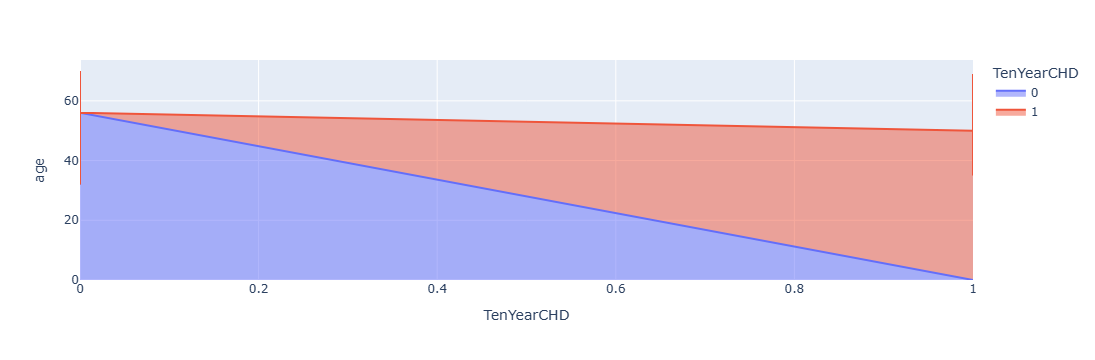

In [99]:
fig = px.area(dataframe , x='TenYearCHD' , y='age' , color ='TenYearCHD')
fig.show()

<Axes: title={'center': 'Histogram of sigs per day'}, ylabel='Frequency'>

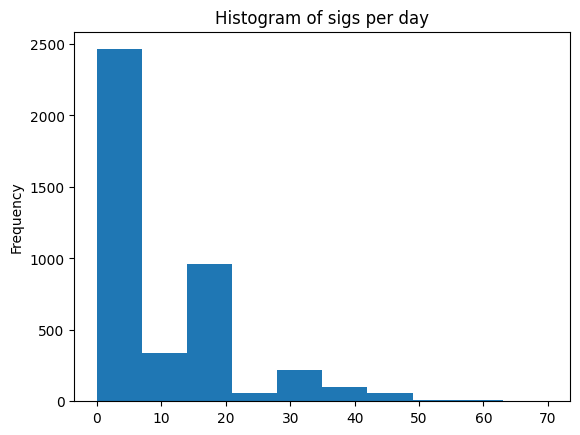

In [100]:
plt.title("Histogram of sigs per day")
plt.xlabel("cigarettes")
dataframe['cigsPerDay'].plot.hist()

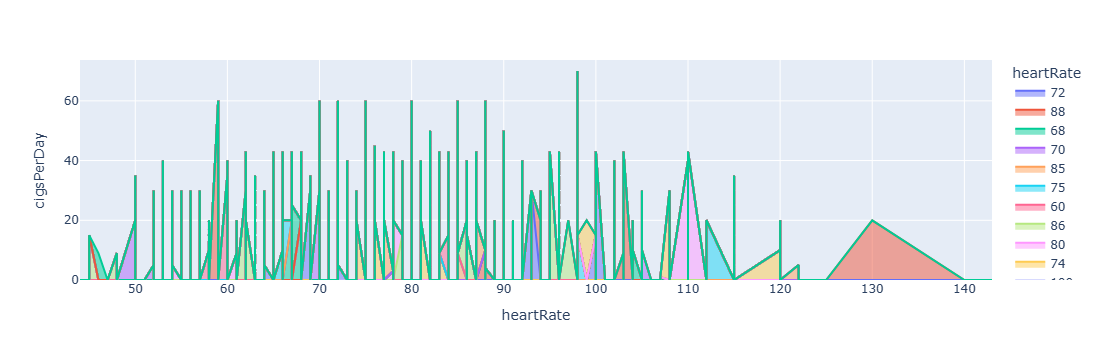

In [101]:
fig = px.area(dataframe , x='heartRate' , y='cigsPerDay' , color ='heartRate')
fig.show()

In [102]:
x = dataframe['education']
y = dataframe['cigsPerDay']

In [103]:
x_test , x_train , y_test , y_train = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [104]:
model = LinearRegression()
model.fit([x_train],[y_train])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [105]:
b = model.predict([x_test[:844]])
b

array([[29.,  7.,  0.,  1.,  0., 20., 40.,  3.,  0.,  0., 20.,  0.,  0.,
        20.,  0.,  9., 43.,  0., 20.,  3., 20.,  0.,  3.,  5.,  0.,  0.,
         0., 30., 15., 20., 15.,  0.,  0.,  0., 43.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0., 15., 20., 10., 30.,
         0.,  0.,  0., 20.,  0., 20., 10., 25.,  0.,  1.,  5.,  3., 20.,
         0.,  9., 20.,  0.,  9., 40.,  0.,  0., 20.,  0., 20., 25.,  9.,
         3., 10., 15.,  0., 40.,  0.,  0.,  0., 15.,  6., 15.,  0., 30.,
         3.,  0.,  5., 10., 20.,  0., 20., 20.,  0.,  0.,  0., 15., 30.,
         0.,  0.,  0., 20.,  0.,  0., 20., 20., 15., 15.,  0., 20., 20.,
        20.,  0., 10.,  0.,  0.,  0.,  0.,  0., 20.,  0., 10.,  0.,  9.,
        43.,  0., 20., 35.,  0.,  0.,  0., 15.,  0.,  0., 20.,  3.,  0.,
        20., 15.,  0., 15., 20.,  0., 20., 10., 30.,  0.,  0.,  0.,  0.,
         0.,  0., 20.,  0.,  0.,  9.,  0.,  0., 15.,  0.,  0.,  3., 15.,
         0., 20., 20., 20., 30.,  3., 20.,  0., 20.

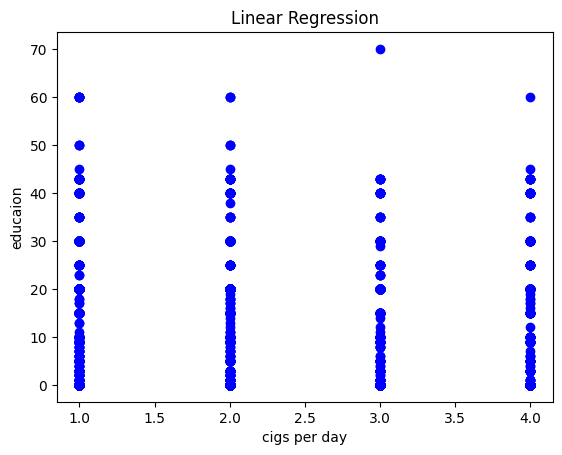

In [106]:
plt.title("Linear Regression")
plt.ylabel("educaion")
plt.xlabel("cigs per day")

plt.scatter(x,y, color='blue', label='y_test')
plt.show()

In [107]:
mse = mean_squared_error(x, y)
r2 = r2_score(x, y)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 191.96160227542072
R² Score: -184.013468602698


In [108]:
#polynominal
X=dataframe[['age','BMI']]
Y=dataframe['heartRate']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [109]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [110]:
model_poly = LinearRegression()
model_poly.fit(X_poly_train, Y_train)
b = model_poly.predict(X_poly_test)

In [111]:
mse = mean_squared_error(Y_test,b)
r2 = r2_score(Y_test,b)

In [112]:
print("MSE:", mse)
print("R² Score:", r2)

MSE: 139.17874741774324
R² Score: -0.007927729144663331


In [113]:
x = dataframe[['age','cigsPerDay']]
y = dataframe['heartRate']

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg =  make_pipeline( StandardScaler(), LogisticRegression(max_iter=1000))
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.12


<Axes: xlabel='heartRate', ylabel='cigsPerDay'>

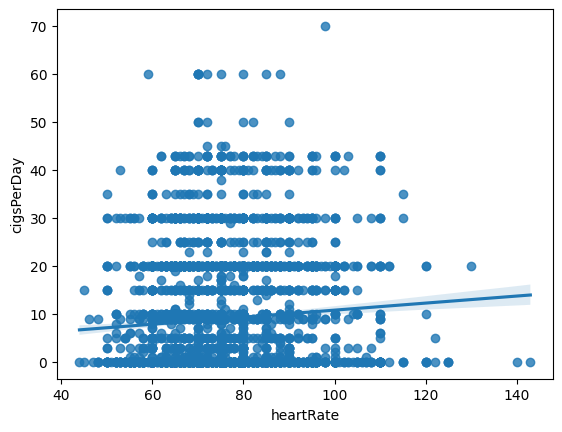

In [124]:
sns.regplot(x='heartRate',y='cigsPerDay',data = dataframe)

<Axes: xlabel='Predicted', ylabel='Actual'>

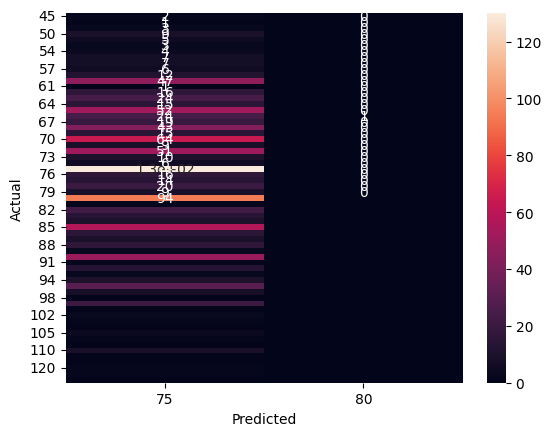

In [125]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          45       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         3
          50       0.00      0.00      0.00         9
          52       0.00      0.00      0.00         5
          53       0.00      0.00      0.00         3
          54       0.00      0.00      0.00         4
          55       0.00      0.00      0.00         7
          56       0.00      0.00      0.00         7
          57       0.00      0.00      0.00         6
          58       0.00      0.00      0.00        12
          60       0.00      0.00      0.00        47
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00        16
          63       0.00      0.00      0.00        24
          64       0.00      0.00      0.00        15
          65       0.00      0.00      0.00        52
          66       0.00    

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [127]:
# AUC : C'est un nombre qui résume la courbe ROC en une seule valeur
# DNC : graph montre l relation entre les vrais positifs et les faux positifs à différents seuils

In [128]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=20, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(x_train, y_train)

# Make probability predictions
y_probs = model.predict_proba(x_test)[:, 1]  # Get the probabilities for the positive class

In [129]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [130]:
# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

AUC: 0.9141713014460511


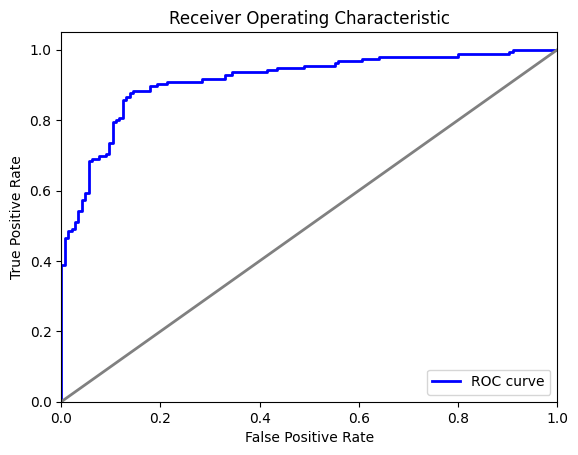

In [131]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")